<a href="https://colab.research.google.com/github/simoneminorr/pca_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams.

Fair warning: Some of these scam e-mails have offensive content. If you start reading the e-mail text or the token data, you might read something offensive. If that's a problem, feel free to e-mail me, and we can talk about it and discuss how to proceed with alternative tasks.

### Q1.

**Tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [25]:
import pandas as pd
import numpy as np

In [5]:
import pickle
with open('/all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

Plot a histogram of the occurrences of tokens.

What do you notice about the frequency of occurrence of different tokens? How does it look?

A: I notice __ about the frequency of occurence of different tokens. The frequencies look like __.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

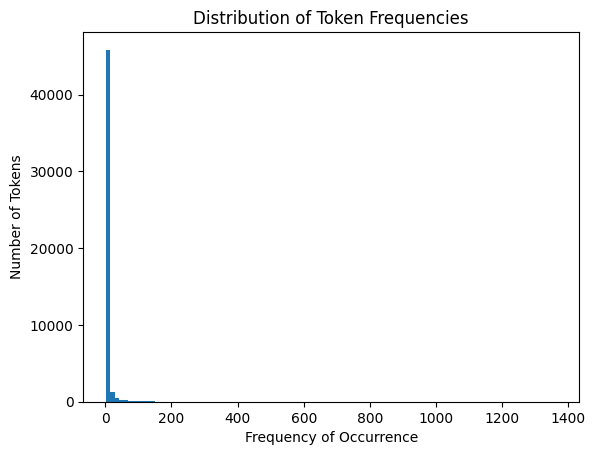

In [11]:
# Extract frequencies from token_freq
frequencies = [freq for token, freq in token_freq]

# Plot a histogram of the frequencies
plt.hist(frequencies, bins=100) # You can adjust the number of bins as needed
plt.xlabel("Frequency of Occurrence")
plt.ylabel("Number of Tokens")
plt.title("Distribution of Token Frequencies")
plt.show()

### Q2.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.

2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?

A: R-squared on the training set: 0.7670
R-squared on the test set: 0.6659

3. What words have the largest coefficients in absolute value and most strongly influence predictions?

A: Top 3 listed below:
intervention         1.259257
localized            0.824350
thermal              0.747006

More listed below in the code (top 10).

In [14]:
phishing = pd.read_parquet('/Phishing_clean.parquet')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R-squared on the training set: {r2_train:.4f}")
print(f"R-squared on the test set: {r2_test:.4f}")

R-squared on the training set: 0.7670
R-squared on the test set: 0.6659


In [27]:
# Get the coefficients and the corresponding feature names (words)
coefficients = model.coef_
feature_names = X.columns

# Creating a pandas Series of coefficients with feature names as index
coef_series = pd.Series(coefficients, index=feature_names)

# Getting absolute values of the coefficients and sort them in descending order
sorted_coef_abs = coef_series.abs().sort_values(ascending=False)

# Displaying the words with the top 10 largest absolute coefficients
print("Words with the largest absolute coefficients:")
print(sorted_coef_abs.head(10)) # Display the top 10 words

Words with the largest absolute coefficients:
intervention         1.259257
localized            0.824350
thermal              0.747006
crawler              0.696167
background-image:    0.622909
helvetica,           0.598560
aging                0.594956
form.                0.576886
gray;                0.574480
a:active             0.574480
dtype: float64


### Q3.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

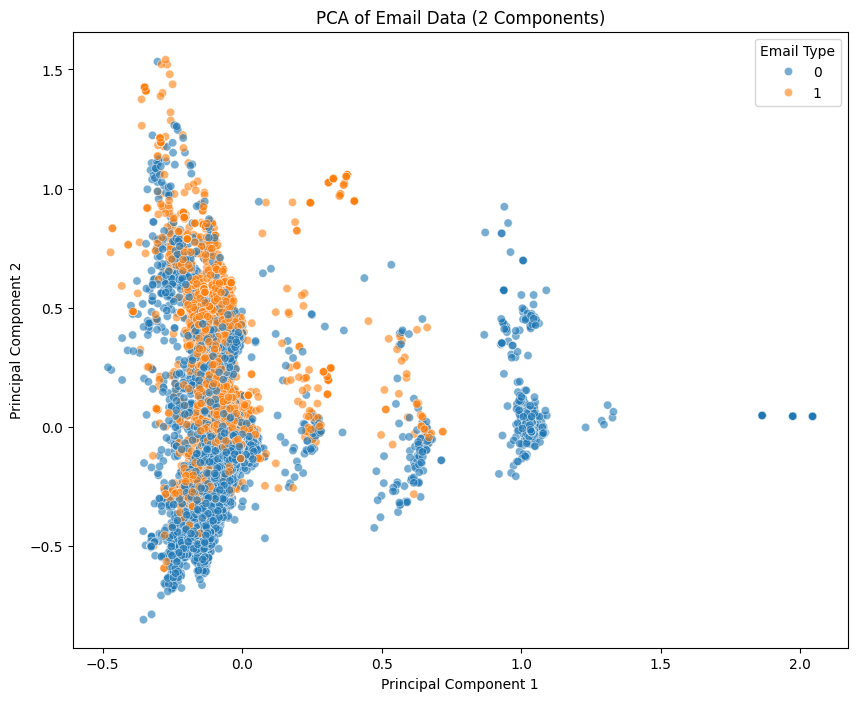

In [22]:
from sklearn.decomposition import PCA

# Performing PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Creating a DataFrame with the principal components and email types
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
pca_df['Email Type'] = y

# Plotting first two principal components, colored by Email Type
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Email Type', data=pca_df, alpha=0.6)
plt.title('PCA of Email Data (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

A: The majority of orange and blue dots are below the 0.0 mark of principal component 1 and clumped together but spread out on the y axis which means that the scam and other emails differ by principal component (PC) 2. The 3 other smaller clusters to the right differ by PC 1. It seems that the blue dots further to the right have a heavier influence of PC 1.

### Q4.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [24]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Performing PCA with 2610 components
pca_2610 = PCA(n_components=2610)
principal_components_2610 = pca_2610.fit_transform(X)

# Splitting the principal components (PCs) into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principal_components_2610, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model on the PCs
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

# Making predictions
y_train_pred_pca = model_pca.predict(X_train_pca)
y_test_pred_pca = model_pca.predict(X_test_pca)

# Calculating R-squared
r2_train_pca = r2_score(y_train_pca, y_train_pred_pca)
r2_test_pca = r2_score(y_test_pca, y_test_pred_pca)

print("\nPCA R-squared values:")
print(f"R-squared on the training set (PCA): {r2_train_pca:.4f}")
print(f"R-squared on the test set (PCA): {r2_test_pca:.4f}")

print("\nCompared to the Original R-squared values:")
print(f"R-squared on the training set (Original Data): {r2_train:.4f}")
print(f"R-squared on the test set (Original Data): {r2_test:.4f}")


PCA R-squared values:
R-squared on the training set (PCA): 0.7662
R-squared on the test set (PCA): 0.6684

Compared to the Original R-squared values:
R-squared on the training set (Original Data): 0.7670
R-squared on the test set (Original Data): 0.6659


A: After comparing their performances, there is little to no significant difference between the R-squared on the training set of the PCA vs the original data or on the test set for either. The R-aquared for the PCA training set is 0.008 lower and the R-aquared on the test set for PCA is 0.0025 higher meaning there is the slighest difference in variance. The closer the R-squared is to 1, the closer fitting the model is. Therefore, the training set of the original data was a closer fit to the model than the PCA and the test set of the PCA was a slightly better fit model than the original data. Nonetheless, the differences are marginal thus the performance does not differ by that much.

### Q5.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.

A: The advantage in using the principal components to run this high-dimension regression, rather than the original data is selection of dimensions, reduces noise, mitigates overfitting, and improves efficency. For one, this method allows for you to select for certain PCs which reduces the noise and the potential complex and confusing colinearities. By doing this, the model is able to reduce features (and thus noise as mentioned) which allows for the model to generalize new data better. Lastly, all of this improves the efficency of the model because by selecting certain features, there is less for the model to compute compared ot the original data.